count    20.800278
mean     13.480503
std       5.946540
min       0.000000
25%       9.500000
50%      14.233333
75%      18.000000
max      23.983333
Name: CRASH TIME INT, dtype: float64

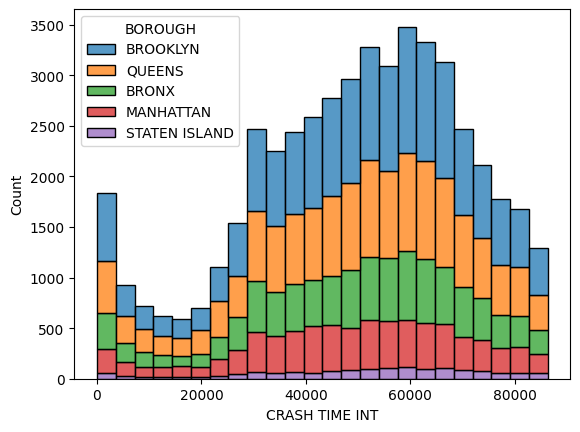

In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime

crashes = pd.read_csv("NYC ACCIDENTS 2020.csv")
# make new column mapping datetimes to integer values, apply function

def to_integer(rows):
    datetime_object = datetime.strptime(rows[1], '%H:%M:%S')
    return 3600*datetime_object.hour + 60*datetime_object.minute + datetime_object.second

crashes['CRASH TIME INT'] = crashes.apply(to_integer, axis=1)

# 1st graph
sns.histplot(data=crashes, x="CRASH TIME INT", bins=24, hue="BOROUGH", hue_order=crashes.value_counts(crashes["BOROUGH"]).iloc[:10].index, multiple="stack"),
crashes["CRASH TIME INT"].describe()/3600

count     5.672500
mean     14.036715
std       6.144217
min       0.000000
25%      10.000000
50%      15.000000
75%      18.750000
max      23.983333
Name: CRASH TIME INT, dtype: float64

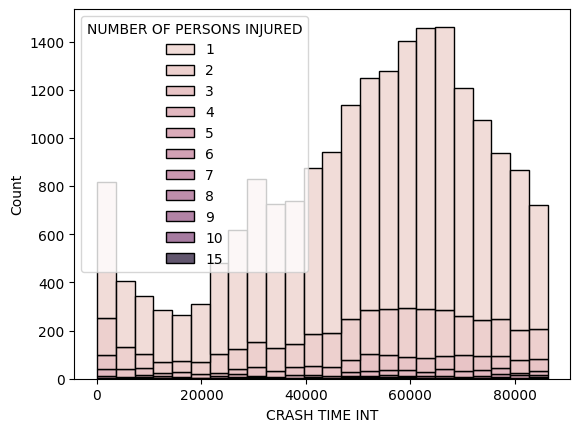

In [3]:
crashesInjured = crashes[crashes["NUMBER OF PERSONS INJURED"] > 0]
crashesKilled = crashes[crashes["NUMBER OF PERSONS KILLED"] > 0]
# 2nd graph
sns.histplot(data=crashesInjured, x="CRASH TIME INT", bins=24, hue="NUMBER OF PERSONS INJURED", hue_order=crashesInjured.value_counts(crashesInjured["NUMBER OF PERSONS INJURED"]).iloc[1:6].index, multiple="stack"),
crashesInjured["CRASH TIME INT"].describe()/3600

count     0.037500
mean     12.700370
std       7.375927
min       0.033333
25%       5.533333
50%      13.483333
75%      19.116667
max      23.966667
Name: CRASH TIME INT, dtype: float64

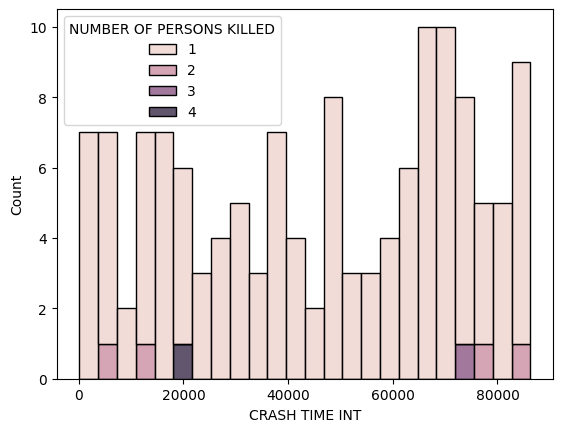

In [5]:
# 3rd graph
sns.histplot(data=crashesKilled, x="CRASH TIME INT", bins=24, hue="NUMBER OF PERSONS KILLED", multiple="stack")
crashesKilled["CRASH TIME INT"].describe()/3600

<AxesSubplot: xlabel='CRASH TIME INT', ylabel='Count'>

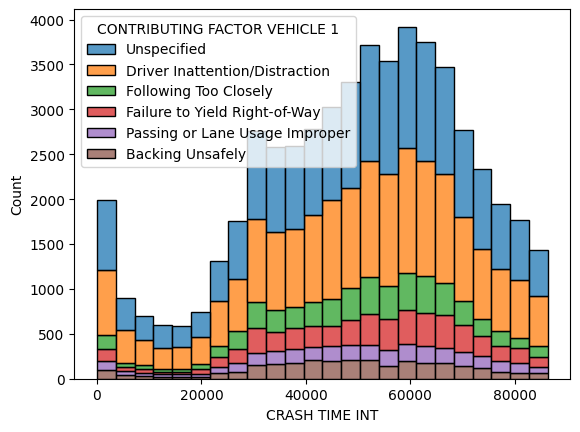

In [7]:
# 4th graph
sns.histplot(data=crashes, x="CRASH TIME INT", bins=24, hue="CONTRIBUTING FACTOR VEHICLE 1", hue_order=crashes.value_counts(crashes["CONTRIBUTING FACTOR VEHICLE 1"]).iloc[0:6].index, multiple="stack")

<AxesSubplot: xlabel='CRASH TIME INT', ylabel='Count'>

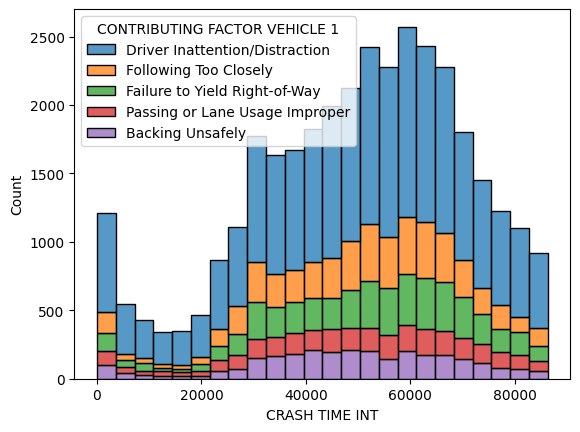

In [6]:
# 5th graph
sns.histplot(data=crashes, x="CRASH TIME INT", bins=24, hue="CONTRIBUTING FACTOR VEHICLE 1", hue_order=crashes.value_counts(crashes["CONTRIBUTING FACTOR VEHICLE 1"]).iloc[1:6].index, multiple="stack")

<AxesSubplot: xlabel='count', ylabel='ON STREET NAME'>

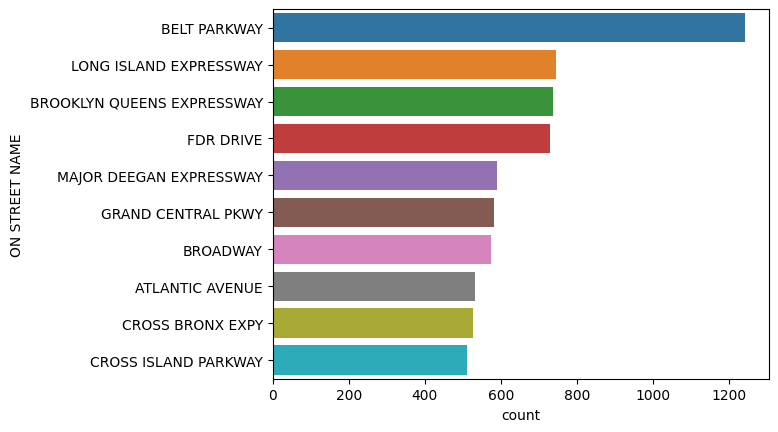

In [59]:
# 6th graph
sns.countplot(data=crashes, y="ON STREET NAME", order=crashes.value_counts(crashes["ON STREET NAME"]).iloc[:10].index)

<AxesSubplot: xlabel='count', ylabel='CONTRIBUTING FACTOR VEHICLE 1'>

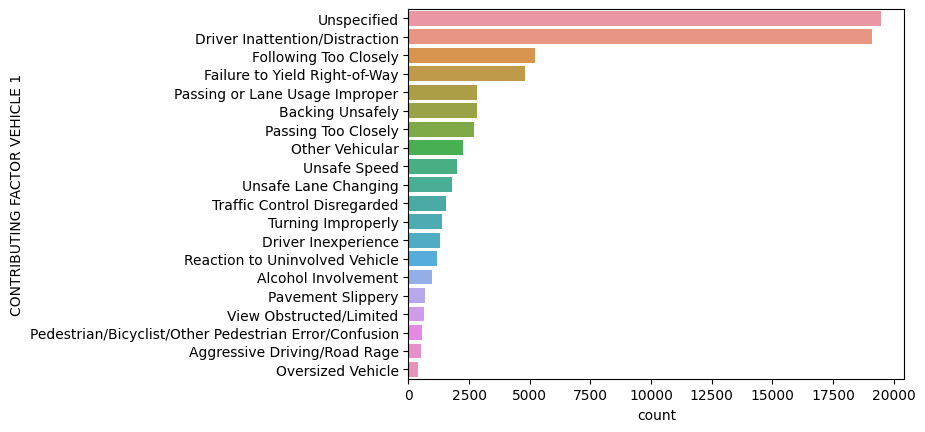

In [68]:
# 7th graph
sns.countplot(data=crashes, y="CONTRIBUTING FACTOR VEHICLE 1", order=crashes.value_counts(crashes["CONTRIBUTING FACTOR VEHICLE 1"]).iloc[:20].index)

<AxesSubplot: xlabel='count', ylabel='BOROUGH'>

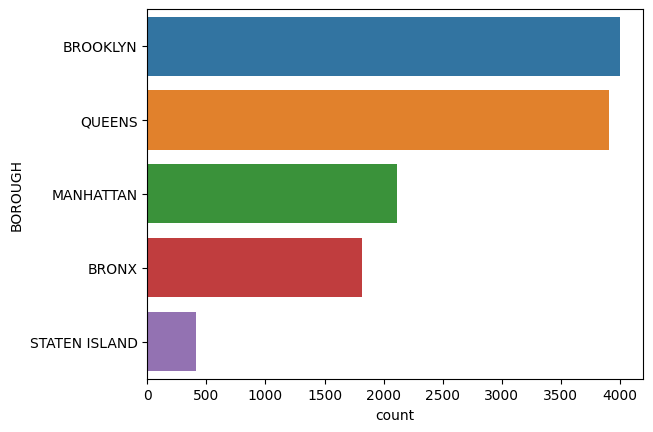

In [116]:
crashesDID = crashes[crashes["CONTRIBUTING FACTOR VEHICLE 1"] == "Driver Inattention/Distraction"]
#sns.histplot(data=crashesDID, x="CRASH TIME INT", bins=24)
# 8th graph
sns.countplot(data=crashesDID, y="BOROUGH", order=crashesDID.value_counts(crashesDID["BOROUGH"]).iloc[:10].index)

<AxesSubplot: xlabel='NUMBER OF PERSONS INJURED', ylabel='count'>

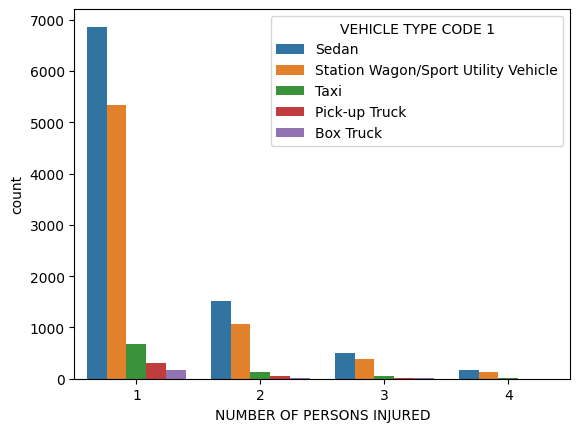

In [133]:
# 9th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS INJURED", hue="VEHICLE TYPE CODE 1", order=crashes.value_counts(crashes["NUMBER OF PERSONS INJURED"]).iloc[1:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)

<AxesSubplot: xlabel='NUMBER OF PERSONS KILLED', ylabel='count'>

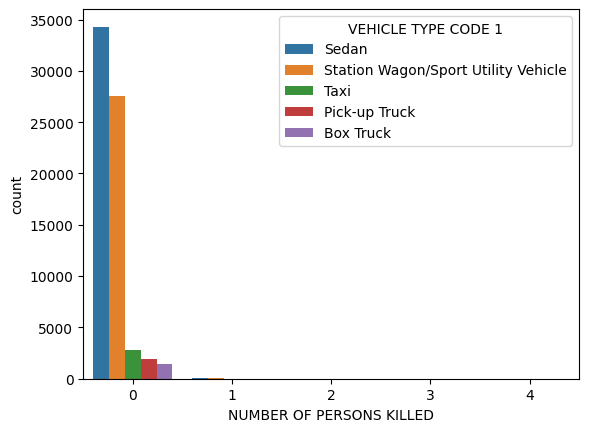

In [169]:
# 10th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS KILLED", hue="VEHICLE TYPE CODE 1", order=crashes.value_counts(crashes["NUMBER OF PERSONS KILLED"]).iloc[0:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)

<AxesSubplot: xlabel='NUMBER OF PERSONS KILLED', ylabel='count'>

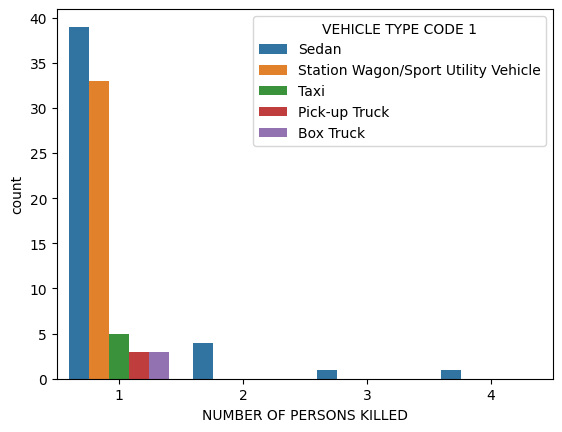

In [170]:
# 11th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS KILLED", hue="VEHICLE TYPE CODE 1", order=crashes.value_counts(crashes["NUMBER OF PERSONS KILLED"]).iloc[1:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)

<AxesSubplot: xlabel='NUMBER OF PERSONS INJURED', ylabel='count'>

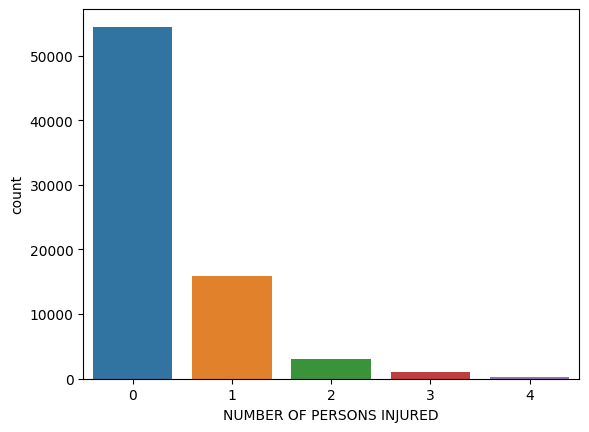

In [9]:
# 12th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS INJURED", order=crashes.value_counts(crashes["NUMBER OF PERSONS INJURED"]).iloc[0:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)

<AxesSubplot: xlabel='NUMBER OF PERSONS KILLED', ylabel='count'>

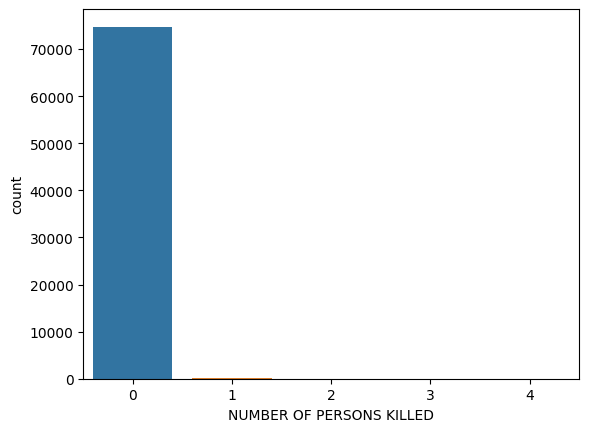

In [10]:
# 13th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS KILLED", order=crashes.value_counts(crashes["NUMBER OF PERSONS KILLED"]).iloc[0:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)

### Analysis:

The principle variables I looked at were Time, Number of Persons Injured and/or Killed and Contributing Factors. The clearest graphable connection and the one I decided to graph first is the number of crashes compared to the time of day.
  
{% highlight python linenos %}
import pandas as pd
import seaborn as sns
from datetime import datetime

crashes = pd.read_csv("../Datasets/NYC ACCIDENTS 2020.csv")
# make new column mapping datetimes to integer values, apply function

def to_integer(rows):
    datetime_object = datetime.strptime(rows[1], '%H:%M:%S')
    return 3600*datetime_object.hour + 60*datetime_object.minute + datetime_object.second

crashes['CRASH TIME INT'] = crashes.apply(to_integer, axis=1)

# 1st graph
sns.histplot(data=crashes, x="CRASH TIME INT", bins=24, hue="BOROUGH", hue_order=crashes.value_counts(crashes["BOROUGH"]).iloc[:10].index, multiple="stack"),
crashes["CRASH TIME INT"].describe()/3600
{% endhighlight %}

Here I wrote a function, using the apply method, to convert all the datetime objects in the second column to integers written into a new column, so it can be more easily read by the seaborn graph plots in histograms.

I also use this piece of code —- ```variable.value_counts(variable).iloc[a:b].index``` -- where variable is some dataset/specific column of a dataset, and a and b are positive ints with a > b. This allows me to organise a categorical variable from highest to lowest (in terms of frequency with which it occured) and choose to include only the b most frequent values excluding the top a values. In the above graph it does not exclude any data as there are less than 10 values for the "BOROUGH" category, but organises the stacking so that the most frequent borough is on the top.

The first graph shows a histogram of crashes during 24 different  time periods (24 hours, each bin representing 1 hour), along with the number of  crashes depending on the borough sorted by highest frequencies top to bottom. Since there are 24 hours and 24 bins, each bin represents a one hour period, starting with the 1st bin representing 00:00 to 1:00 and the last/24th bin representing 23:00 to 00:00. The graph clearly shows a significant jump in number of crashes after 08:00 from roughly 1500 to 2500 crashes. After that the graph fluctuates but there is no significant visible jump between any hours and the number of crashes. Between 08:00 and 20:00, there appears to be the most crashes, ranging from 2500 crashes at 08:00 to 3500 at 17:00. In terms of how dangerous or risky it is to drive at different times, we would expect later hours, such as between 20:00 and 08:00 to be most risky due to it being dark and drivers having less visibility. While it is tempting to say the opposite is true, the increase in crashes between 08:00 and 20:00 is likely due to more drivers being on the road at those times. This reflects a problem with a decent amount of the data and graphs made. For a lot of the variables and any correlations found it is hard to judge that any factor is linked to an increased risk of crashes is impossible without first assuming that the number of cars on the road is constant. If there are more cars on the road at a given time, then obviously there are more chances for crashes to happen, so we would expect more crashes. Without data to reflect traffic levels at different times, it is hard to judge that there is an increased risk of crashes depending on time, purely from this first graph. 
This works for car type as well, as if lots of sedans are on the road, there will obviously be a high number of sedan crashes:

{% highlight python linenos %}
# 9th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS INJURED", hue="VEHICLE TYPE CODE 1", order=crashes.value_counts(crashes["NUMBER OF PERSONS INJURED"]).iloc[1:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)
{% endhighlight %}

There is also the issue of dataset size which becomes apparent when analyzing the data for persons killed. In terms of graphing it, most crashes have 0 deaths. :

{% highlight python linenos %}
# 10th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS KILLED", hue="VEHICLE TYPE CODE 1", order=crashes.value_counts(crashes["NUMBER OF PERSONS KILLED"]).iloc[0:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)
{% endhighlight %}

The values for 1 persons killed are barely visible and makes the data appear as if there is basically 0 car crashes with 1 person killed, making it hard to analyze the crashes with persons killed. When analyzing data excluding the 0 death car crashes:

{% highlight python linenos %}
# 11th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS KILLED", hue="VEHICLE TYPE CODE 1", order=crashes.value_counts(crashes["NUMBER OF PERSONS KILLED"]).iloc[1:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)
{% endhighlight %}

The data becomes so small as to become unreliable, suggesting that only sedans have crashes with more than 1 death. This is just due to the fact that there are so few crashes with more than 1 deaths, and the majority of vehicles on the road are sedans.

For analyzing the data, it is more feasable to judge factors about the actual crash that happened compared to the total number of crashes. In the first graph I allowed hues to represent the borough just to show the number of crashes for different boroughs along with time. The boroughs all roughly follow the same overall relationship with time, increasing the number of crashes primarily at 08:00 and lowering after 20:00, suggesting that there is no large difference between boroughs in terms of when crashes happen.
I then decided to analyse the number of injuries depending on time by graphing the same time frequency histogram with number of injuries being the hue instead of boroughs.

{% highlight python linenos %}
crashesInjured = crashes[crashes["NUMBER OF PERSONS INJURED"] > 0]
crashesKilled = crashes[crashes["NUMBER OF PERSONS KILLED"] > 0]
# 2nd graph
sns.histplot(data=crashesInjured, x="CRASH TIME INT", bins=24, hue="NUMBER OF PERSONS INJURED", hue_order=crashesInjured.value_counts(crashesInjured["NUMBER OF PERSONS INJURED"]).iloc[1:6].index, multiple="stack"),
crashesInjured["CRASH TIME INT"].describe()/3600
{% endhighlight %}

The 2nd graph follows the trend for the main graph somewhat similarly. The number of crashes with injuries (excluding 0 injury crashes) increased from 300 to 1450 between 04:00 to 19:00, an increase by a factor of 4.83. For the same time period with total crashes, the number of crashes increases from 1000 to 5000, a factor increase of 5. The total crashes and injury crashes both increase by a sizeable amount, retaining the same rough shape, increasing in number at roughly the same time and decreasing at roughly the same time, suggesting time does not have much of effect on number of crash injuries. If we do this same analysis for number of crashes with persons killed:

{% highlight python linenos %}
# 3rd graph
sns.histplot(data=crashesKilled, x="CRASH TIME INT", bins=24, hue="NUMBER OF PERSONS KILLED", multiple="stack")
crashesKilled["CRASH TIME INT"].describe()/3600
{% endhighlight %}

For this graph we would expect the crash deaths to follow a similar trend to overall crashes if the variable is independent of time. However the graph does not trend downwards until 08:00, and then increasing until 20:00 before falling back down. For 1 death crashes it is hard to say that here is a strong relationship or trend, but it would appear that the number of crashes with 1 deaths stays somewhat constant or possibly follows a curve with a low point at mid day and high points at the start and end of the day. Furthermore, crashes with greater than 1 deaths only occur during the first 6 or last 4 hours of the day, almost the opposite to when the most number of crashes happen. This suggests that some times might be more prone for people to be killed in car crashes, particularly the hours of 20:00 to 6:00, where we would normally expect to see a lower number of deathly crashes due to less actual crashes occuring at those times overall. However, one notable problem with this graph is the size of this specific section of data. The total number of crashes amounts to 153 for this section of the dataset, with a max count of crashes in 1 specific hour interval of only 10. The size of this dataset is much smaller in comparison to the overall dataset, making it much less reliable and certain.
Some other graphs that do not yield any substantial correlations or connections are:

{% highlight python linenos %}
# 4th graph
sns.histplot(data=crashes, x="CRASH TIME INT", bins=24, hue="CONTRIBUTING FACTOR VEHICLE 1", hue_order=crashes.value_counts(crashes["CONTRIBUTING FACTOR VEHICLE 1"]).iloc[0:6].index, multiple="stack")

# 5th graph
sns.histplot(data=crashes, x="CRASH TIME INT", bins=24, hue="CONTRIBUTING FACTOR VEHICLE 1", hue_order=crashes.value_counts(crashes["CONTRIBUTING FACTOR VEHICLE 1"]).iloc[1:6].index, multiple="stack")

# 6th graph
sns.countplot(data=crashes, y="ON STREET NAME", order=crashes.value_counts(crashes["ON STREET NAME"]).iloc[:10].index)

# 7th graph
sns.countplot(data=crashes, y="CONTRIBUTING FACTOR VEHICLE 1", order=crashes.value_counts(crashes["CONTRIBUTING FACTOR VEHICLE 1"]).iloc[:20].index)

crashesDID = crashes[crashes["CONTRIBUTING FACTOR VEHICLE 1"] == "Driver Inattention/Distraction"]
#sns.histplot(data=crashesDID, x="CRASH TIME INT", bins=24)
# 8th graph
sns.countplot(data=crashesDID, y="BOROUGH", order=crashesDID.value_counts(crashesDID["BOROUGH"]).iloc[:10].index)
{% endhighlight %}

There is some information available in the lack of information.

{% highlight python linenos %}
# 12th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS INJURED", order=crashes.value_counts(crashes["NUMBER OF PERSONS INJURED"]).iloc[0:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)

# 13th graph
sns.countplot(data=crashes, x="NUMBER OF PERSONS KILLED", order=crashes.value_counts(crashes["NUMBER OF PERSONS KILLED"]).iloc[0:5].index, hue_order=crashes.value_counts(crashes["VEHICLE TYPE CODE 1"]).iloc[:5].index)
{% endhighlight %}

Looking at the 12th graph, the vast majority of crashes have 0 injuries, roughly 5500. 1 person injury crashes total to around 1500 crashes, and each subsequent crashes bar with more than 1 person injured totals to less than 500. The majority of the crashes are between 0 and 1 injuries. Focusing on only 0 or 1 injury crashes, 0 injury crashes acount for just under 80% of the total crashes. 
Looking at the 13th graph, the overwhelming majority of crashes have 0 persons killed, so great that each subsequent category (1, 2, 3 persons killed) is practically negligible.

These graphs suggest that the risk of fatal car crashes is very low. Cars in NYC and crashes that occur there are fairly safe, so safety mechanisms and technology developments are functioning well and likely protecting lives. If increased safety is desired, it may be difficult to reduce the fatality of car crashes any further with how low it is, so efforts should likely be placed on reducing the chances that a crash even occurs in the first place.